<a href="https://colab.research.google.com/github/Suratan63011017/Longan-Longkong-Langsat-Classification/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Augmented_DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install split-folders

In [ ]:
import os
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from numpy import save
from numpy import load
#import splitfolders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#splitfolders.ratio('/content/drive/MyDrive/DEEP_LEARNING/LumYai', output="/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LumYai",
#                  seed=1337, ratio=(.7, .1, .2),
#                  group_prefix=None)

In [ ]:
#splitfolders.ratio('/content/drive/MyDrive/DEEP_LEARNING/LongGong', output="/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LongGong",
#                  seed=1337, ratio=(.7, .1, .2),
#                  group_prefix=None)

In [ ]:
#splitfolders.ratio('/content/drive/MyDrive/DEEP_LEARNING/LangSad', output="/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LangSad",
#                  seed=1337, ratio=(.7, .1, .2),
#                  group_prefix=None)

In [ ]:
#print(os.listdir('/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LongGong/train/Default'))

['new (364).JPG', 'new (365).JPG', 'new (366).JPG', 'new (367).JPG', 'new (371).JPG', 'new (370).JPG', 'new (372).JPG', 'new (373).JPG', 'new (374).JPG', 'new (375).JPG', 'new (376).JPG', 'new (377).JPG', 'new (379).JPG', 'new (378).JPG', 'new (382).JPG', 'new (381).JPG', 'new (384).JPG', 'new (386).JPG', 'new (388).JPG', 'new (389).JPG', 'new (390).JPG', 'new (396).JPG', 'new (392).JPG', 'new (391).JPG', 'new (393).JPG', 'new (394).JPG', 'new (395).JPG', 'new (398).JPG', 'new (397).JPG', 'new (400).JPG', 'new (402).JPG', 'new (404).JPG', 'new (403).JPG', 'new (407).JPG', 'new (409).JPG', 'new (408).JPG', 'new (410).JPG', 'new (411).JPG', 'new (414).JPG', 'new (412).JPG', 'new (413).JPG', 'new (416).JPG', 'new (417).JPG', 'new (423).JPG', 'new (425).JPG', 'new (424).JPG', 'new (422).JPG', 'new (419).JPG', 'new (427).JPG', 'new (426).JPG', 'new (431).JPG', 'new (430).JPG', 'new (429).JPG', 'new (433).JPG', 'new (432).JPG', 'new (434).JPG', 'new (435).JPG', 'new (437).JPG', 'new (438).JP

In [ ]:
#len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/train/Default'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/train/Blur'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/train/Brightness'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/train/Cropped'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/train/FlipLeftRight'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/train/FlipUpDown'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/train/Mixed'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/train/Rotate'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/train/Scale'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/test/Default'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/test/Blur'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/test/Brightness'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/test/Cropped'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/test/FlipLeftRight'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/test/FlipUpDown'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/test/Mixed'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/test/Rotate'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/vgg16/test/Scale'))

In [ ]:
#len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/train/Default'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/train/Blur'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/train/Brightness'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/train/Cropped'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/train/FlipLeftRight'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/train/FlipUpDown'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/train/Mixed'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/train/Rotate'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/train/Scale'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/test/Default'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/test/Blur'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/test/Brightness'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/test/Cropped'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/test/FlipLeftRight'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/test/FlipUpDown'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/test/Mixed'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/test/Rotate'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/test/Scale'))

In [ ]:
#len(os.listdir('/content/drive/MyDrive/Deep_Learning/LongGong/Default'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LongGong/Blur'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LongGong/Brightness'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LongGong/Cropped'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LongGong/FlipLeftRight'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LongGong/FlipUpDown'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LongGong/Mixed'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LongGong/Rotate'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LongGong/Scale'))

In [ ]:
#len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/train/Default'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/train/Blur'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/train/Brightness'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/train/Cropped'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/train/FlipLeftRight'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/train/FlipUpDown'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/train/Mixed'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/train/Rotate'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/train/Scale'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/test/Default'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/test/Blur'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/test/Brightness'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/test/Cropped'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/test/FlipLeftRight'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/test/FlipUpDown'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/test/Mixed'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/test/Rotate'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/test/Scale'))

In [ ]:
#len(os.listdir('/content/drive/MyDrive/Deep_Learning/LangSad/Default'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LangSad/Blur'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LangSad/Brightness'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LangSad/Cropped'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LangSad/FlipLeftRight'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LangSad/FlipUpDown'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LangSad/Mixed'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LangSad/Rotate'))+len(os.listdir('/content/drive/MyDrive/Deep_Learning/LangSad/Scale'))

In [ ]:
len(os.listdir('/content/drive/MyDrive/DEEP_LEARNING/LongGong/Default'))

1859

(<matplotlib.axes._subplots.AxesSubplot at 0x7f091c957610>,
 <matplotlib.image.AxesImage at 0x7f091712f090>)

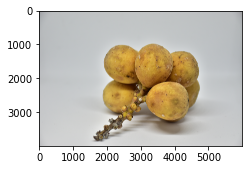

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/DEEP_LEARNING/LongGong/Default/DSC_0671.JPG')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,4))
plt.subplot(121),plt.imshow(img1)

(<matplotlib.axes._subplots.AxesSubplot at 0x7faff9247110>,
 <matplotlib.image.AxesImage at 0x7faff8d71710>)

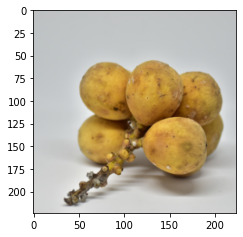

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/DEEP_LEARNING/LongGong/Default/DSC_0671.JPG')
scale_percent = 5 # percent of original size
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (600, 400), interpolation = cv2.INTER_AREA)
img2 = img2[0:400, 100:500]
img2 = cv2.resize(img2, (224, 224), interpolation = cv2.INTER_AREA)
plt.figure(figsize=(8,4))
plt.subplot(121),plt.imshow(img2)

In [ ]:
trainpath = ['/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LangSad/train/','/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LongGong/train/','/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LumYai/train/']
valpath = ['/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LangSad/val/','/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LongGong/val/','/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LumYai/val/']
testpath = ['/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LangSad/test/','/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LongGong/test/','/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LumYai/test/']
trainImg = []
valImg = []
testImg = []
for i in trainpath:
  for f in listdir(i):
    trainImg.append(i+f+'/')
for i in valpath:
  for f in listdir(i):
    valImg.append(i+f+'/')
for i in testpath:
  for f in listdir(i):
    testImg.append(i+f+'/')
#trainImg = [trainpath+f for f in listdir(i) for i in trainpath]
#testImg = [testpath+f for f in listdir(testpath)]

In [ ]:
def img2data(path):
  rawImgs = []
  labels = []
  i=0
  for imagePath in (path):
    for item in tqdm(listdir(imagePath)):
      file = join(imagePath, item)
      img = cv2.imread(file , cv2.COLOR_BGR2RGB)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
      rawImgs.append(img)
      if imagePath in path[:9]:
        labels.append([1,0,0])
      elif imagePath in path[9:18]:
        labels.append([0,1,0])
      elif imagePath in path[18:27]:
        labels.append([0,0,1])
  return rawImgs, labels

In [ ]:
trainImg ,valImg, testImg

In [ ]:
# train_path=['/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LangSad/train/Default','/content/drive/MyDrive/DEEP_LEARNING/[Augmented]LangSad/train/Default','/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/train/Default']
# test_path=['/content/drive/MyDrive/Deep_Learning/vgg16/test/Default','/content/drive/MyDrive/Deep_Learning/[Pre-model]LongGong/test/Default','/content/drive/MyDrive/Deep_Learning/[Pre-model]LangSad/test/Default']

In [ ]:
x_train, y_train = img2data(trainImg)
x_val, y_val = img2data(valImg)
x_test, y_test = img2data(testImg)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train = load('/content/drive/MyDrive/DEEP_LEARNING/Data/x_train.npy')
y_train = load('/content/drive/MyDrive/DEEP_LEARNING/Data/y_train.npy')
x_val = load('/content/drive/MyDrive/DEEP_LEARNING/Data/x_val.npy')
y_val = load('/content/drive/MyDrive/DEEP_LEARNING/Data/y_val.npy')
x_test = load('/content/drive/MyDrive/DEEP_LEARNING/Data/x_test.npy')
y_test = load('/content/drive/MyDrive/DEEP_LEARNING/Data/y_test.npy')


x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((44098, 224, 224, 3),
 (44098, 3),
 (6087, 224, 224, 3),
 (6087, 3),
 (12241, 224, 224, 3),
 (12241, 3))

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import glob 
import os 
import cv2
import math
from keras import applications
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub

In [34]:
 mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [35]:
mobile_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(224,224,3))

In [ ]:
# base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
#                                                    include_top=False,
#                                                    weights='imagenet')
# base_model.trainable = False

# model = Sequential([
#         base_model,
        
#         Conv2D(224, 3, activation='relu'),
#         Dense(16),
#         Flatten(),
#         Dense(3, activation='softmax')
#     ])


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold  
from keras.models import Sequential  
from keras.layers import Dense, Dropout  
from keras.wrappers.scikit_learn import KerasClassifier  
def create_my_model(learnRate, dropoutRate):  
    # Creating the model  
    model = tf.keras.Sequential([
      mobile_net_layers,
      tf.keras.layers.Dropout(dropoutRate),
      tf.keras.layers.Dense(3,activation='softmax')
    ])
      
    # Compile the model  
    myadam = Adam(learning_rate = learnRate)  
    model.compile(loss = 'binary_crossentropy', optimizer = myadam, metrics = ['accuracy'])  
    return model  
  
# Creating the model object  
model = KerasClassifier(build_fn = create_my_model, verbose = 1)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
# Defining the arguments that we want to use in Grid Search along  
# with the list of values that we want to try out  
learnRate = [ 0.0001,0.00003, 0.00001]  
dropoutRate = [0.2, 0.3,0.4]  
#batchSize = [10, 20, 30]  
epochs = [10,20,40]  
  
# Making a dictionary of the grid search parameters  
paramgrid = dict(learnRate = learnRate, dropoutRate = dropoutRate, epochs = epochs )  
  
# Building and fitting the GridSearchCV  
mygrid = GridSearchCV(estimator = model, param_grid = paramgrid, cv = KFold(random_state = None), verbose = 10)  
  
gridresults = mygrid.fit(x_train, y_train,validation_data=(x_val, y_val))  
  
# Summarizing the results in a readable format  
print("Best: " + gridresults.best_score_ + " using " + gridresults.best_params_)  
  
means = gridresults.cv_results_['mean_test_score']  
stds = gridresults.cv_results_['std_test_score']  
params = gridresults.cv_results_['params']  
  
for mean, stdev, param in zip(means, stds, params):  
    print(mean + "(" + stdev + ")" + " with: " + param)  

In [36]:
mobile_net_layers.trainable = False

In [38]:
# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Flatten())
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=3, activation="softmax"))

In [50]:
model = tf.keras.Sequential([
  mobile_net_layers,
  tf.keras.layers.Dense(3,activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_9 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [51]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_9 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [52]:
from keras.optimizers import Adam
opt = tf.keras.optimizers.Adam(learning_rate=0.00003)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [53]:
history = model.fit(x_train, y_train , epochs=40 ,validation_data=(x_val, y_val))

Epoch 1/40
1379/1379 [==============================] - 19s 13ms/step - loss: 0.8916 - accuracy: 0.5994 - val_loss: 0.7164 - val_accuracy: 0.7130
Epoch 2/40
1379/1379 [==============================] - 17s 13ms/step - loss: 0.6573 - accuracy: 0.7428 - val_loss: 0.6066 - val_accuracy: 0.7600
Epoch 3/40
1379/1379 [==============================] - 17s 13ms/step - loss: 0.5802 - accuracy: 0.7758 - val_loss: 0.5531 - val_accuracy: 0.7797
Epoch 4/40
1379/1379 [==============================] - 17s 13ms/step - loss: 0.5360 - accuracy: 0.7940 - val_loss: 0.5151 - val_accuracy: 0.7994
Epoch 5/40
1379/1379 [==============================] - 17s 13ms/step - loss: 0.5057 - accuracy: 0.8070 - val_loss: 0.4897 - val_accuracy: 0.8084
Epoch 6/40
1379/1379 [==============================] - 17s 13ms/step - loss: 0.4835 - accuracy: 0.8153 - val_loss: 0.4694 - val_accuracy: 0.8190
Epoch 7/40
1379/1379 [==============================] - 17s 13ms/step - loss: 0.4659 - accuracy: 0.8227 - val_loss: 0.4552 -

KeyboardInterrupt: ignored

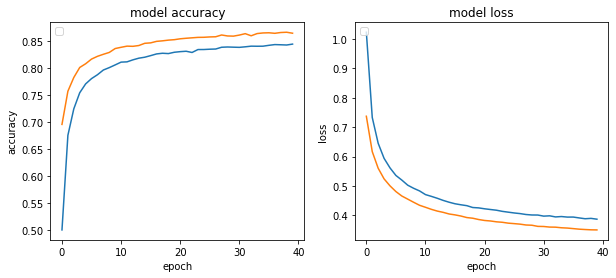

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(121),
plt.title('model accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['accuracy']);plt.plot(history.history['val_accuracy'])

plt.subplot(122)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['loss']);plt.plot(history.history['val_loss'])


In [46]:
test_score=model.evaluate(x_test,y_test)

383/383 [==============================] - 4s 11ms/step - loss: 0.3590 - accuracy: 0.8589


In [49]:
model.save('/content/drive/MyDrive/DEEP_LEARNING/optimized-model')

In [ ]:
rimg = []
path = ['/content/drive/MyDrive/DEEP_LEARNING/Test_From_Internet/']
for imagePath in path:
  for item in (os.listdir(imagePath)):
      print(imagePath.split('/')[5][11:])
      file = os.path.join(imagePath, item)
      img = cv2.imread(file , cv2.COLOR_BGR2RGB)
      ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      #img = img[0:4000, 1000:5000]
      img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
      rimg = np.array(img)
      rimg = np.reshape(rimg ,(1,224,224,3))
      predict = model.predict(rimg)
      label = ['LangSad','LongGong','LumYai']
      result = label[np.argmax(predict)]
      print(predict)
      print('real:'+str(item))
      print('predict:'+str(result))
      plt.imshow(ori)
      plt.show()

In [ ]:
rimg = []
total_correct = 0
total_pic = 0

for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        total_pic+=1
        img = cv2.imread(file , cv2.COLOR_BGR2RGB)
        ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img = img[0:4000, 1000:5000]
        img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
        rimg = np.array(img)
        rimg = np.reshape(rimg ,(1,224,224,3))
        predict = model.predict(rimg)
        label = ['LangSad','LongGong','LumYai']
        result = label[np.argmax(predict)]
        print(predict)
        print('real:'+str(item))
        print('predict:'+str(result))
        if str(imagePath.split('/')[5][11:]) == str(result):
          print("Correct")
          total_correct +=1
        else:
          print("Fault")
        #plt.imshow(ori)
        #plt.show()

print('Summary : '+ str(total_correct/total_pic*100))
